In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

Import the dataset

In [ ]:
data=pd.read_csv("/content/Aus_grocery_synthetic_dataset2.csv")
df=pd.DataFrame(data)
df.head()

,Category,Sub_category,Product_Group,Product_Name,Brand,Sku,RunDate,unit_price_x
0,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,Coles,1491280P,11/9/2022,6.50
1,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Livers,Coles,1718058P,11/9/2022,9.00
2,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Giblets,Coles,2565429P,11/9/2022,7.50
3,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Frames,Coles,3199541P,11/9/2022,4.50
4,Meat & seafood,Poultry,Crumbed chicken,RSPCA Chicken Schnitzel Plain Crumb,Coles,2904193P,11/9/2022,8.75


Changing RunDate and unit_price_x as required for the Prophet model

In [ ]:
df['ds'] = pd.to_datetime(df['RunDate'], errors='coerce')  # Prophet-compatible date
df['y'] = df['unit_price_x']  # Target variable
df.head()

,Category,Sub_category,Product_Group,Product_Name,Brand,Sku,RunDate,unit_price_x,ds,y
0,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,Coles,1491280P,11/9/2022,6.50,2022-11-09,6.50
1,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Livers,Coles,1718058P,11/9/2022,9.00,2022-11-09,9.00
2,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Giblets,Coles,2565429P,11/9/2022,7.50,2022-11-09,7.50
3,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Frames,Coles,3199541P,11/9/2022,4.50,2022-11-09,4.50
4,Meat & seafood,Poultry,Crumbed chicken,RSPCA Chicken Schnitzel Plain Crumb,Coles,2904193P,11/9/2022,8.75,2022-11-09,8.75


In [ ]:
df = df.sort_values(by='RunDate')

df.head()

,Category,Sub_category,Product_Group,Product_Name,Brand,Sku,RunDate,unit_price_x,ds,y
45877,"Dairy, eggs & fridge",Dairy,Yoghurt,Yopro Perform Yoghurt Peach,Danone,4935019P,1/1/2020,3.58,2020-01-01,3.58
18369,Pantry,Sauces,Stir-fry and curries,Ready Sauce Cantonese Chicken,Lee Kum Kee,8104473P,1/1/2020,1.55,2020-01-01,1.55
51288,"Dairy, eggs & fridge",Milk,Milk flavoured,Lime Flavoured Milk,Breaka,5891087P,1/1/2020,6.94,2020-01-01,6.94
52432,Meat & seafood,Beef & veal,Beef steaks,Beef Rump Steak,Coles,8601707P,1/1/2020,26.49,2020-01-01,26.49
57064,Pantry,"Jams, honey & spreads",Jams,Jam Raspberry,Coles,5409452P,1/1/2020,2.34,2020-01-01,2.34


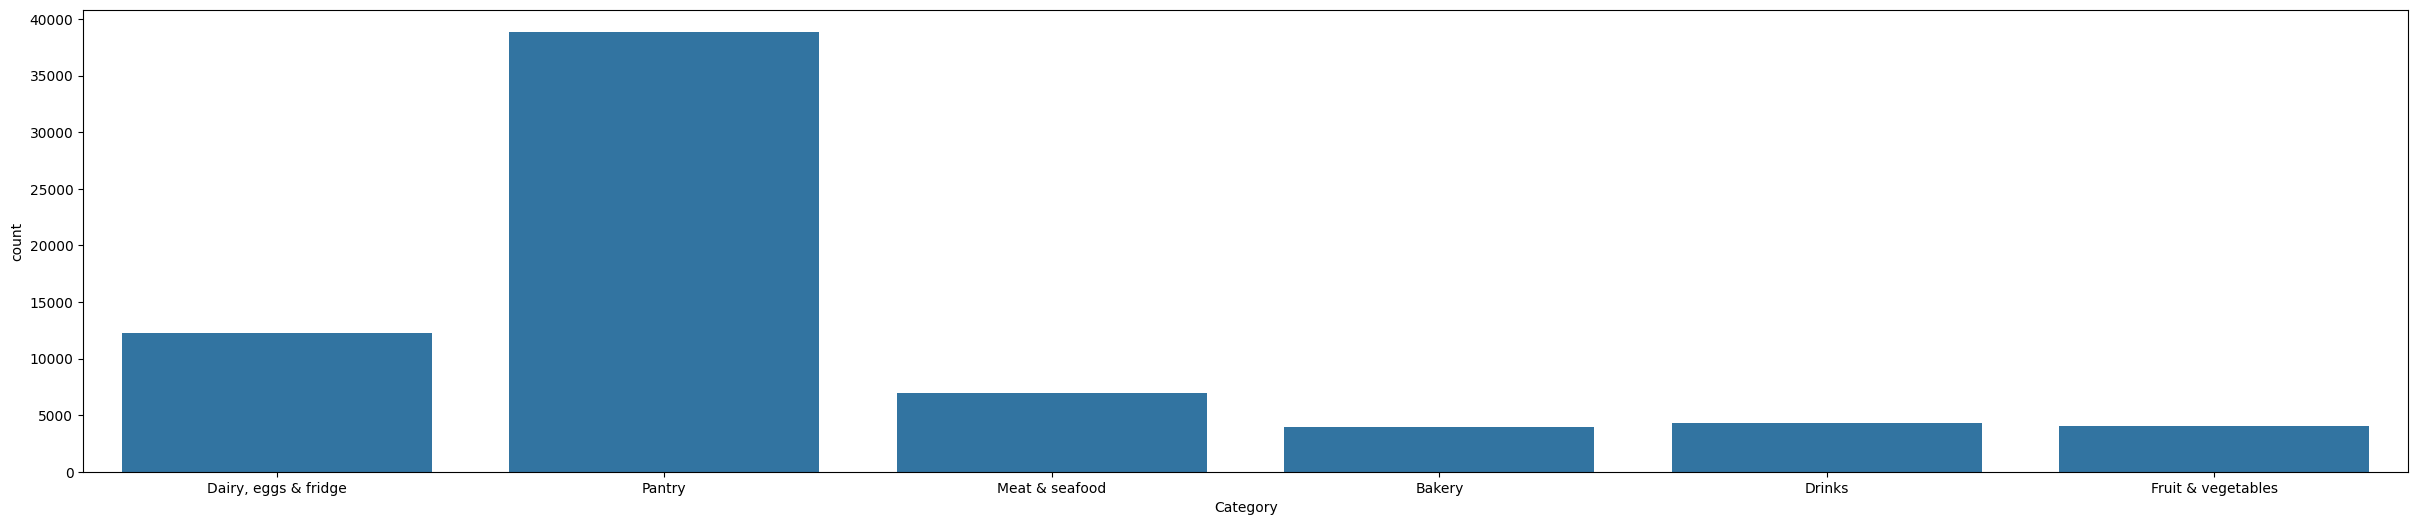

In [ ]:
#Bar plots to show frequency of categories
plt.figure(figsize=(30,6))
sns.countplot(x='Category', data=df)
plt.show()

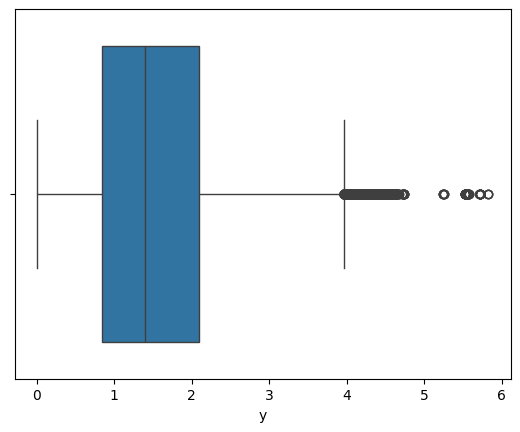

In [ ]:
#Apply log transformation
df['y'] = np.log1p(df['y'])

#To find any outliers
sns.boxplot(x=df['y'])
plt.show()

Removing outliers using IQR method

In [ ]:
#Remove outliers
Q1 = df['y'].quantile(0.25)
Q3 = df['y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['y'] >= lower_bound) & (df['y'] <= upper_bound)]



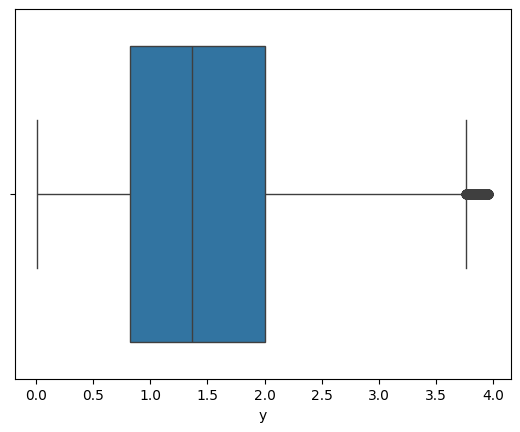

In [ ]:
#To find any outliers
sns.boxplot(x=df['y'])
plt.show()

In [ ]:
df = df.dropna(subset=['y', 'ds'])  # Remove NaNs
df.head()

,Category,Sub_category,Product_Group,Product_Name,Brand,Sku,RunDate,unit_price_x,ds,y
45877,"Dairy, eggs & fridge",Dairy,Yoghurt,Yopro Perform Yoghurt Peach,Danone,4935019P,1/1/2020,3.58,2020-01-01,1.521699
18369,Pantry,Sauces,Stir-fry and curries,Ready Sauce Cantonese Chicken,Lee Kum Kee,8104473P,1/1/2020,1.55,2020-01-01,0.936093
51288,"Dairy, eggs & fridge",Milk,Milk flavoured,Lime Flavoured Milk,Breaka,5891087P,1/1/2020,6.94,2020-01-01,2.071913
52432,Meat & seafood,Beef & veal,Beef steaks,Beef Rump Steak,Coles,8601707P,1/1/2020,26.49,2020-01-01,3.313822
57064,Pantry,"Jams, honey & spreads",Jams,Jam Raspberry,Coles,5409452P,1/1/2020,2.34,2020-01-01,1.205971


In [ ]:
df_prophet=df[['ds','y']]

#Split data as train and test datasets
train = df_prophet.iloc[:-365]
test = df_prophet.iloc[-365:]

# Create the model
model = Prophet()



# Fit the model
model.fit(train)

# Create a DataFrame with future dates
future = model.make_future_dataframe(periods=365)

# Make predictions
forecast = model.predict(future)

# Extract the predictions corresponding to the test set dates
forecast_test = forecast[-365:]



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpia51p8hc/wvramsha.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpia51p8hc/e5iyh53s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=291', 'data', 'file=/tmp/tmpia51p8hc/wvramsha.json', 'init=/tmp/tmpia51p8hc/e5iyh53s.json', 'output', 'file=/tmp/tmpia51p8hc/prophet_model7zj9zj34/prophet_model-20241205020457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:04:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:05:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


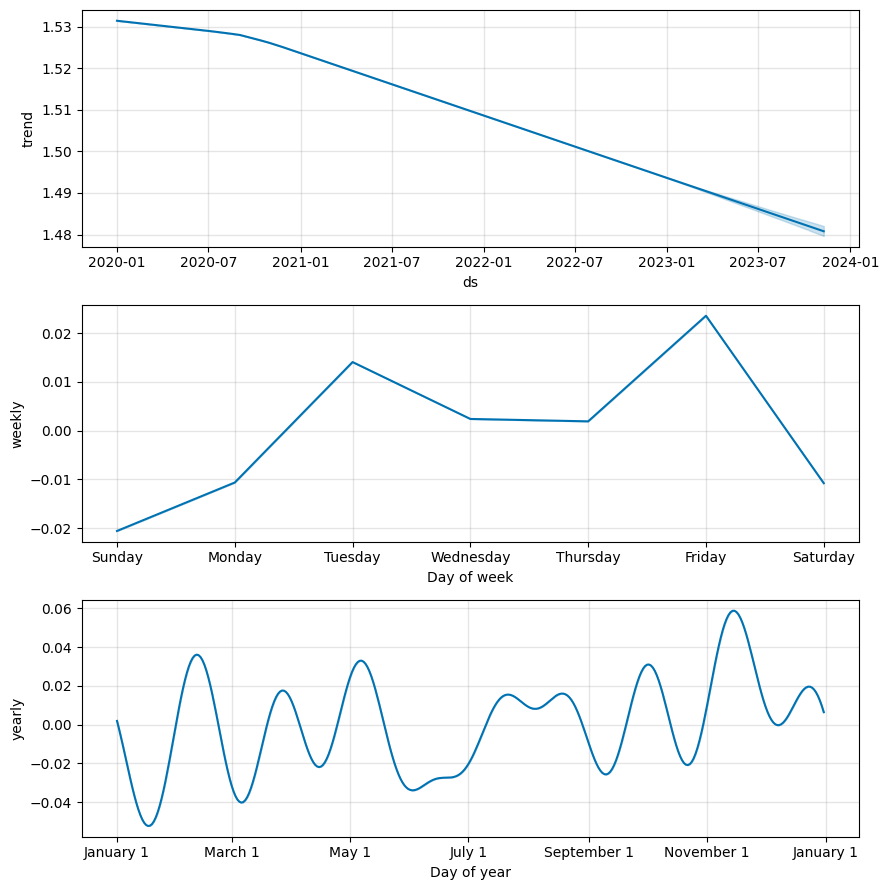

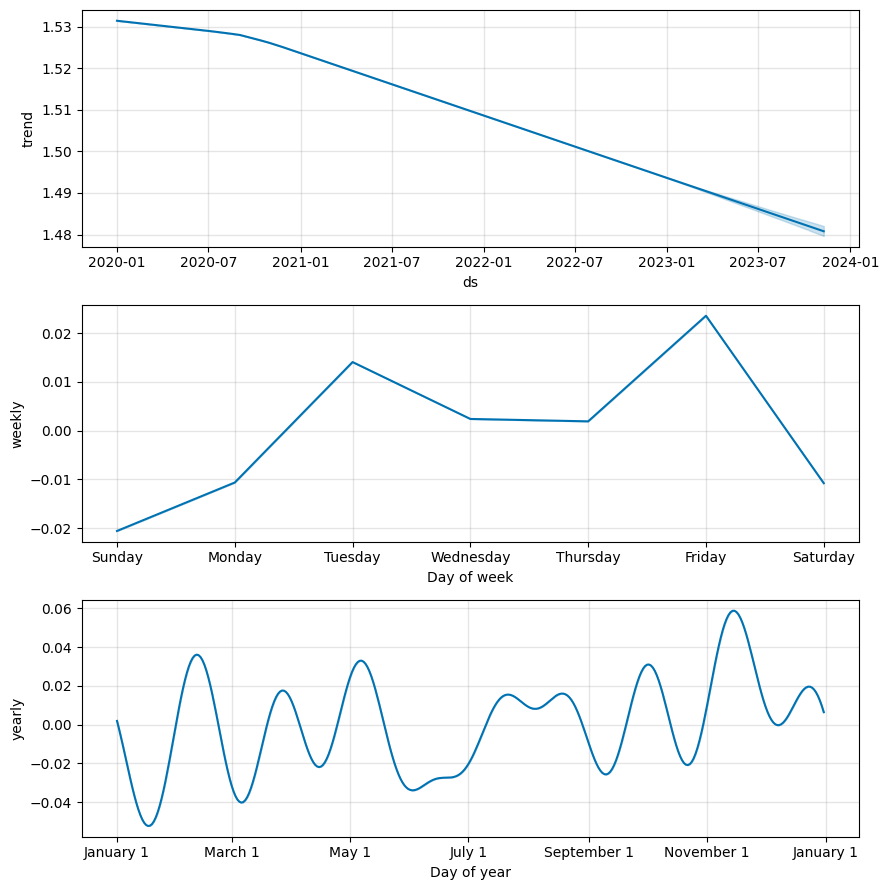

In [ ]:
model.plot_components(forecast)


1. Weekly Trend (Day of the Week):
Key Insight: Discounts or price variations appear to be influenced by the day of the week.

Tuesday: The weekly plot shows a spike on Tuesday, suggesting higher prices or reduced discounts.

Friday: Another spike occurs, indicating possibly higher demand and reduced discounts before the weekend.

Sunday and Monday: These days have the lowest values, indicating the possibility of higher discounts or lower prices to attract customers at the start of the week.
2. Yearly Trend (Seasonal Variations):

Key Insight: The yearly trend reveals cyclic patterns in prices across different months.

Peaks: Noticeable price increases occur around March, July, and November-December.

Dips: Lower prices are observed in January, May, and September.
3. Trend Over Time (General Price Direction):

Key Insight: The overall trend shows prices rising until mid-2020, then declining steadily afterward.
This could indicate that the supermarket:

Initially increased prices (possibly due to inflation or higher costs).

Later offered more discounts or price cuts due to competitive pressures or reduced demand.

In [ ]:
print(forecast.columns)


Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test['y'], forecast_test['yhat'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['y'], forecast_test['yhat'])

print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}')


MSE: 0.86, RMSE: 0.93, MAE: 0.74


The error metrics are low, indicating the model is performing reasonably well on this dataset.
RMSE is slightly higher than MAE, suggesting there might be some predictions with larger errors (outliers).

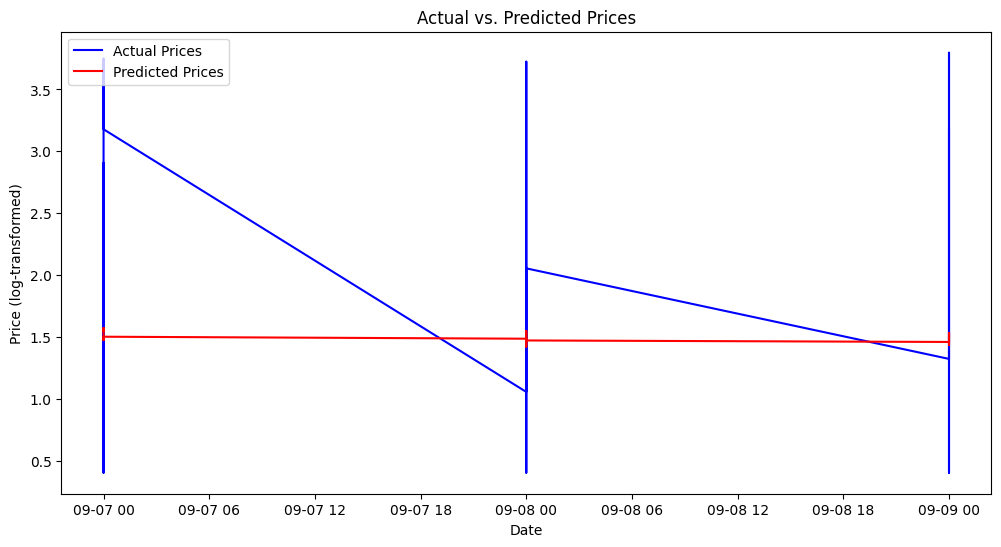

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label="Actual Prices", color='blue')
plt.plot(test['ds'], forecast_test['yhat'], label="Predicted Prices", color='red')
plt.xlabel("Date")
plt.ylabel("Price (log-transformed)")
plt.title("Actual vs. Predicted Prices")
plt.legend()
plt.show()
